# Modules

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler

import plotly.express as px
import matplotlib.pyplot as plt

## Data

In [2]:
data= pd.read_excel('DatosFinales.xlsx', sheet_name='Datos')

In [3]:
age= pd.read_csv("Dataset_Aborto.csv")

/tmp/ipykernel_57/2648480520.py:1: DtypeWarning: Columns (13,20,28,29,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  age= pd.read_csv("Dataset_Aborto.csv")


In [4]:
data["edad"] =age.edad

In [5]:
data.head()

,anticonceptivo,nivel_edu,ocupacion,año,nile,edocivil_descripcion,alc_o_municipio,parentesco,religion,motiles,fsexual,embarazos,entidad,edad_cat,fsexual_cat,x,Segmento,edad
0,NO CONTESTO,SIN ACCESO A LA EDUCACION FORMAL,EMPLEADA,2017,0,VIUDA,EL PAREDÓN,PAREJA,CATOLICA,INTERRUPCION VOLUNTARIA,45,7,OTROS,17-25,>35,15.0,NaN,24
1,NINGUNO,PREPARATORIA,NO PERCIBE INGRESO,2017,0,UNION LIBRE,IZTAPALAPA,PAREJA,CATOLICA,INTERRUPCION VOLUNTARIA,15,5,CIUDAD DE MEXICO,30-35,<17,28.0,NaN,30
2,NINGUNO,SECUNDARIA,EMPLEADA,2017,0,UNION LIBRE,MILPA ALTA,PAREJA,CATOLICA,INTERRUPCION VOLUNTARIA,45,5,CIUDAD DE MEXICO,>35,>35,16.0,NaN,38
3,LARGA DURACION,PREPARATORIA,NO PERCIBE INGRESO,2018,0,CASADA,GUSTAVO A. MADERO,No contesto,CATOLICA,INTERRUPCION VOLUNTARIA,16,4,CIUDAD DE MEXICO,17-25,<17,19.0,Jóvenes con preparatoria,23
4,CONDON,SECUNDARIA,NO PERCIBE INGRESO,2016,0,UNION LIBRE,IZTAPALAPA,FAMILIAR MUJER,CATOLICA,INTERRUPCION VOLUNTARIA,17,4,CIUDAD DE MEXICO,17-25,17-25,16.0,NaN,18


# Preprocessing

## Manange of Null values

In [6]:
data.isnull().mean()

anticonceptivo          0.000000
nivel_edu               0.000000
ocupacion               0.000000
año                     0.000000
nile                    0.000000
edocivil_descripcion    0.000000
alc_o_municipio         0.000000
parentesco              0.000000
religion                0.000000
motiles                 0.000000
fsexual                 0.000000
embarazos               0.000000
entidad                 0.000000
edad_cat                0.000000
fsexual_cat             0.000000
x                       0.998204
Segmento                0.792387
edad                    0.000000
dtype: float64

### Selection of categories

In [8]:
ls_cat= ['anticonceptivo', 'nivel_edu', 'ocupacion','edocivil_descripcion','entidad']
ls_cont= ['fsexual','edad','embarazos']

In [9]:
df= data[ls_cat+ls_cont].copy()

## Group categorical values

In [ ]:
for feature in ls_cat:
    print(f'-------------{feature}--------------------')
    print(df[feature].value_counts())

### Anticonceptivo

In [11]:
df['usoAnticon']= df['anticonceptivo'].apply(lambda x: 'No' if x in ['NINGUNO', 'NO CONTESTO'] else 'Si')

### Nivel educativo

In [12]:
dc_edu= {'PREPARATORIA': 'Educación Media', 'SECUNDARIA': 'Educación Básica',
         'PRIMARIA': 'Educación Básica', 'NO CONTESTO': 'Educación Básica',
         'EDUCACIÓN SUPERIOR': 'Educación superior',
          'SIN ACCESO A LA EDUCACION FORMAL': 'Sin acceso'}

In [13]:
df['educacion']= df['nivel_edu'].apply(lambda x: dc_edu[x])

### Estado civil

In [14]:
df['estadoCivS']= df['edocivil_descripcion'].apply(lambda x: 'Con pareja' if x in ['CASADA','UNION LIBRE'] else 'Soltera')

In [15]:
df.head()

,anticonceptivo,nivel_edu,ocupacion,edocivil_descripcion,entidad,fsexual,edad,embarazos,usoAnticon,educacion,estadoCivS
0,NO CONTESTO,SIN ACCESO A LA EDUCACION FORMAL,EMPLEADA,VIUDA,OTROS,45,24,7,No,Sin acceso,Soltera
1,NINGUNO,PREPARATORIA,NO PERCIBE INGRESO,UNION LIBRE,CIUDAD DE MEXICO,15,30,5,No,Educación Media,Con pareja
2,NINGUNO,SECUNDARIA,EMPLEADA,UNION LIBRE,CIUDAD DE MEXICO,45,38,5,No,Educación Básica,Con pareja
3,LARGA DURACION,PREPARATORIA,NO PERCIBE INGRESO,CASADA,CIUDAD DE MEXICO,16,23,4,Si,Educación Media,Con pareja
4,CONDON,SECUNDARIA,NO PERCIBE INGRESO,UNION LIBRE,CIUDAD DE MEXICO,17,18,4,Si,Educación Básica,Con pareja


## Dummies

In [37]:
aux= df[['fsexual', 'edad', 'embarazos','entidad',
         'ocupacion', 'usoAnticon', 'educacion','estadoCivS']].copy()

In [39]:
aux_dum=pd.get_dummies(aux)

### Remove collinearity

In [41]:
ls_drop_dum= ['entidad_OTROS','ocupacion_NO PERCIBE INGRESO','usoAnticon_No', 'educacion_Sin acceso','estadoCivS_Soltera']

In [42]:
aux_dum=aux_dum.drop(ls_drop_dum,axis=1)

In [43]:
aux_dum.tail()

,fsexual,edad,embarazos,entidad_CIUDAD DE MEXICO,entidad_ESTADO DE MEXICO,ocupacion_EMPLEADA,ocupacion_ESTUDIANTE,usoAnticon_Si,educacion_Educación Básica,educacion_Educación Media,educacion_Educación superior,estadoCivS_Con pareja
98014,18,21,0,0,0,1,0,0,0,0,1,0
98015,19,32,0,0,0,1,0,0,0,0,1,1
98016,45,29,0,0,0,0,0,0,1,0,0,0
98017,17,24,0,0,0,0,1,0,0,1,0,0
98018,16,23,0,0,0,0,0,0,0,0,1,0


# PCA

In [ ]:
pca = PCA(n_components=3,svd_solver='full')
pca.fit(aux_dum)

In [25]:
print(pca.explained_variance_ratio_)

[0.49638527 0.47479068 0.00567005]


In [26]:
z= pca.transform(aux_dum)

In [47]:
aux['z1'] = z[:,0]
aux['z2'] = z[:,1]
aux['z3'] = z[:,2]

## Data visualization

In [ ]:
fig = px.scatter(aux, 
                 x='z1', y='z2',  
                 color='educacion',
                 symbol='ocupacion',
                 #labels='',
                 #text='wav_filename',
                 hover_data=['fsexual', 'edad', 'embarazos', 'entidad', 'ocupacion', 'usoAnticon','educacion', 'estadoCivS'],
                 template="simple_white"
                 #template="plotly_dark",
                 )

fig.show()

In [ ]:
fig = px.scatter_3d(aux, 
                 x='z1', y='z2',z= 'z3',  
                 color='educacion',
                 symbol='ocupacion',
                 #labels='',
                 #text='wav_filename',
                 hover_data=['fsexual', 'edad', 'embarazos', 'entidad', 'ocupacion', 'usoAnticon','educacion', 'estadoCivS'],
                 template="simple_white"
                 #template="plotly_dark",
                 )

fig.show()

## Number of clusters

In [32]:
sc = MinMaxScaler()
Xs = pd.DataFrame(data=sc.fit_transform(aux_dum), columns=aux_dum.columns, index=aux_dum.index)

In [ ]:
sse,db,slc = {}, {}, {}
for k in range(2, 7):
    print(f'----------------{k}--------------------------')
    cluster = GaussianMixture(n_components=k, random_state=10).fit(Xs)
    clusters = cluster.predict(Xs)
    db[k] = davies_bouldin_score(Xs,clusters)
    slc[k] = silhouette_score(Xs,clusters)

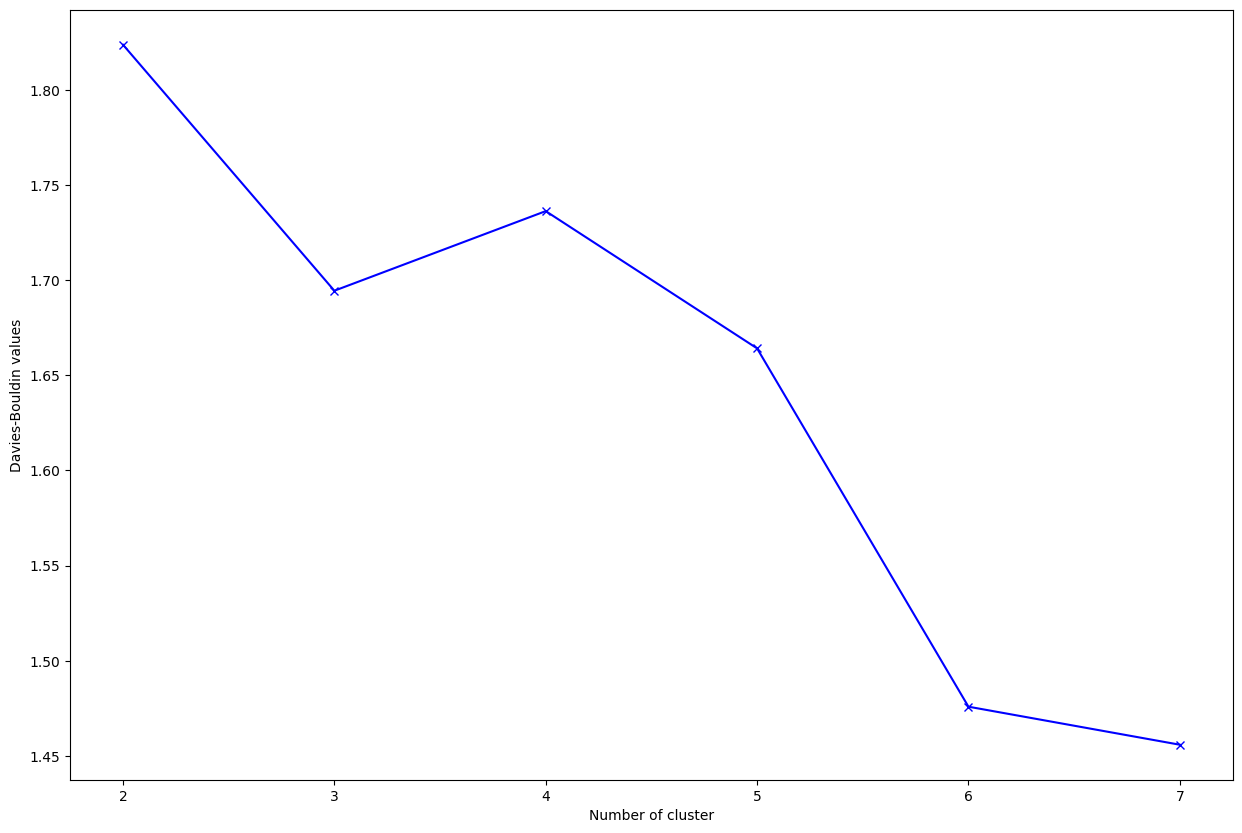

In [52]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

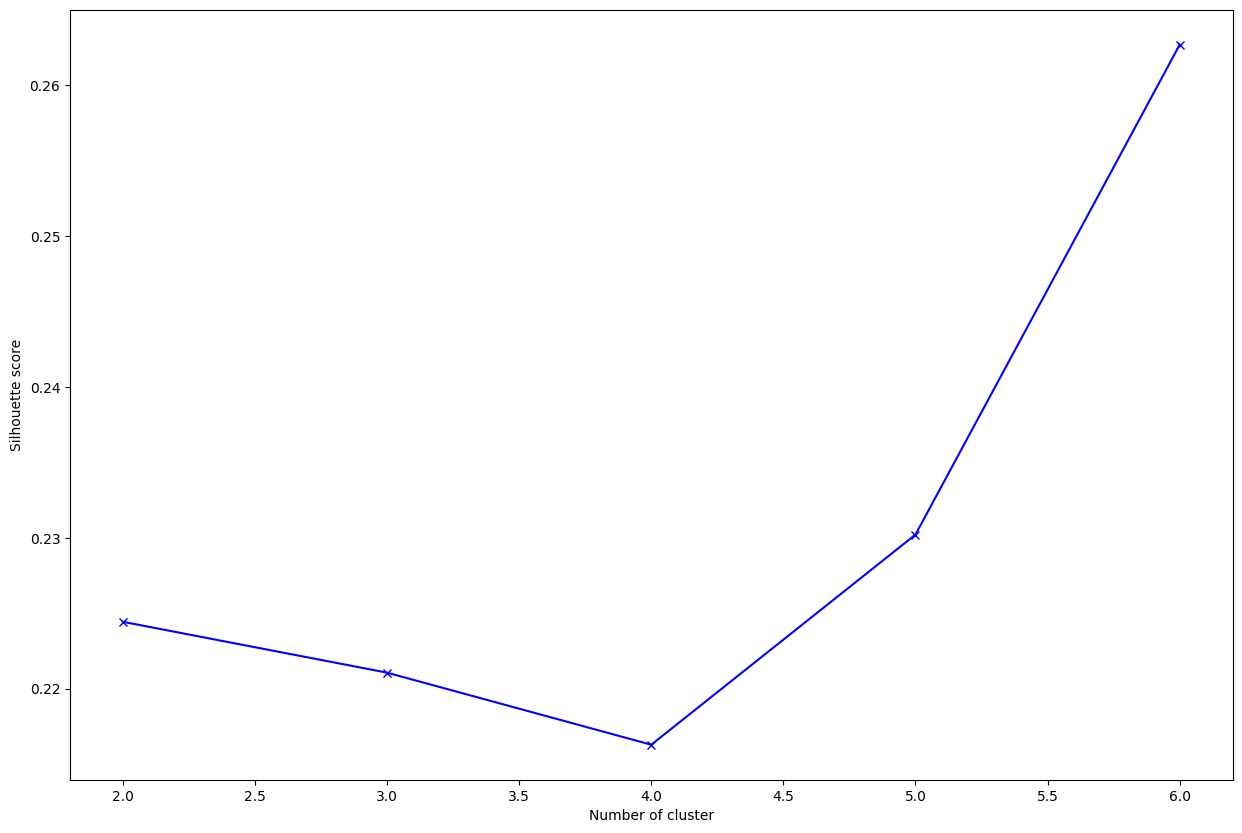

In [53]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

In [74]:
cluster = GaussianMixture(n_components=6, random_state=10)

cluster.fit(Xs)

aux["cl"] = Xs["cl"] = aux_dum['cl']=[str(x) for x in cluster.predict(Xs)]

In [50]:
aux.head()

,fsexual,edad,embarazos,entidad,ocupacion,usoAnticon,educacion,estadoCivS,cl,z1,z2,z3
0,45,24,7,OTROS,EMPLEADA,No,Sin acceso,Soltera,0,-1.666363,26.628078,2.677207
1,15,30,5,CIUDAD DE MEXICO,NO PERCIBE INGRESO,No,Educación Media,Con pareja,5,4.123910,-3.398012,1.798325
2,45,38,5,CIUDAD DE MEXICO,EMPLEADA,No,Educación Básica,Con pareja,3,12.334820,26.542083,2.998456
3,16,23,4,CIUDAD DE MEXICO,NO PERCIBE INGRESO,Si,Educación Media,Con pareja,5,-2.867479,-2.340719,1.414361
4,17,18,4,CIUDAD DE MEXICO,NO PERCIBE INGRESO,Si,Educación Básica,Con pareja,3,-7.861120,-1.308670,2.406722


### Cluster visualization

In [ ]:
fig = px.scatter(aux, 
                 x='z1', y='z2',  
                 color='cl',
                 #symbol='ocupacion',
                 #labels='',
                 #text='wav_filename',
                 hover_data=['fsexual', 'edad', 'embarazos', 'entidad', 'ocupacion', 'usoAnticon','educacion', 'estadoCivS'],
                 template="simple_white"
                 #template="plotly_dark",
                 )

fig.show()

In [ ]:
fig = px.scatter_3d(aux, 
                 x='z1', y='z2',z= 'z3',  
                 color='cl',
                 #symbol='ocupacion',
                 #labels='',
                 #text='wav_filename',
                 hover_data=['fsexual', 'edad', 'embarazos', 'entidad', 'ocupacion', 'usoAnticon','educacion', 'estadoCivS'],
                 template="simple_white"
                 #template="plotly_dark",
                 )

fig.show()

## Cluster

In [77]:
aux_dum.groupby('cl')['fsexual'].count()/len(Xs)*100

cl
0    12.163968
1    23.942297
2    17.250737
3    18.335221
4    14.859364
5    13.448413
Name: fsexual, dtype: float64

In [ ]:
aux_dum.groupby('cl').mean()

Cluster 0 -> Estado de mexico, Sin trabajo, No usa condon, Educación basica  
Cluster 1 -> Ciudad de Mexico, Sin trabajo, No usa condon, Educación basica  
Cluster 2 -> Ciudad de Mexico, No estudia, No usa condon, Educación media, Grupo con mas pareja, Mayor numero embarazos  
Cluster 3 -> Area metropolitana, Empleada/estudiante, Menos uso de condon, Superior
Cluster 4 -> Estado de mexico, Distribución uniforme empleo, Educación media, 
Cluster 5 -> Ciudad de Mexico, Estudiante, Educación medica, Mas